In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
df = pd.read_csv('happiness.csv')
df.head()

,구분별(1),구분별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,구분별(1),구분별(2),행복지수 종합,항목별 행복지수,항목별 행복지수,항목별 행복지수,항목별 행복지수,항목별 행복지수
1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
2,서울시,소계,6.7184596,7.2067965,6.1161352,6.7823744,6.8869873,6.6000048
3,성별,남성,6.7476923,7.2978792,6.1248071,6.7976944,6.8956674,6.6224135
4,성별,여성,6.6913339,7.1222786,6.1080883,6.7681586,6.8789328,6.5792112


In [339]:
df.columns = df.iloc[1]
df.drop([0, 1], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
0,서울시,소계,6.7184596,7.2067965,6.1161352,6.7823744,6.8869873,6.6000048
1,성별,남성,6.7476923,7.2978792,6.1248071,6.7976944,6.8956674,6.6224135
2,성별,여성,6.6913339,7.1222786,6.1080883,6.7681586,6.8789328,6.5792112
3,연령별,10대,6.9124685,7.6750149,5.783973,7.1061859,7.1429177,6.8542511
4,연령별,20대,6.9807589,7.7308668,6.0822969,7.1077906,7.0724683,6.9103721


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   구분별(1)         55 non-null     object
 1   구분별(2)         55 non-null     object
 2   소계             55 non-null     object
 3   자신의 건강상태       55 non-null     object
 4   자신의 재정상태       55 non-null     object
 5   주위 친지 친구와의 관계  55 non-null     object
 6   가정생활           55 non-null     object
 7   사회생활           55 non-null     object
dtypes: object(8)
memory usage: 3.6+ KB


In [341]:
df = df.astype({'소계':'float', '자신의 건강상태':'float', '자신의 재정상태':'float', '주위 친지 친구와의 관계':'float', '가정생활':'float', '사회생활':'float'}) 

In [342]:
df.dtypes

1
구분별(1)            object
구분별(2)            object
소계               float64
자신의 건강상태         float64
자신의 재정상태         float64
주위 친지 친구와의 관계    float64
가정생활             float64
사회생활             float64
dtype: object

In [343]:
df.groupby('구분별(1)')['구분별(2)'].nunique()

구분별(1)
서울시       1
성별        2
소득별       5
연령별       6
지역대분류     5
지역소분류    25
직업분류      4
학력별       4
혼인상태별     3
Name: 구분별(2), dtype: int64

In [344]:
# 한글 폰트
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

In [395]:
gender_df = df[df['구분별(1)'] == '성별']
age_df = df[df['구분별(1)'] == '연령별']
edu_df = df[df['구분별(1)'] == '학력별']
income_df = df[df['구분별(1)'] == '소득별']
marital_df = df[df['구분별(1)'] == '혼인상태별']
region_df = df[df['구분별(1)'] == '지역대분류']
regionsub_df = df[df['구분별(1)'] == '지역소분류']
job_df = df[df['구분별(1)'] == '직업분류']

df_list = [gender_df, age_df, edu_df, income_df, marital_df, region_df, regionsub_df, job_df]

In [400]:
def barplot_visualization(df)->None:
    fig, ax = plt.subplots(figsize=(12, 4))
    df_melted = df.melt(id_vars=['구분별(1)', '구분별(2)'], var_name='Factors', value_name='Happiness')
    sns.barplot(data=df_melted, x='Factors', y='Happiness', hue='구분별(2)', palette='coolwarm')
    plt.xlabel('Factors')
    plt.ylabel('Happiness')
    plt.xticks(fontsize=8)
    plt.legend(bbox_to_anchor=(1, 0.65), fontsize=8)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()),
            fontsize=7, color='black', ha='center', va='bottom')
    plt.show()

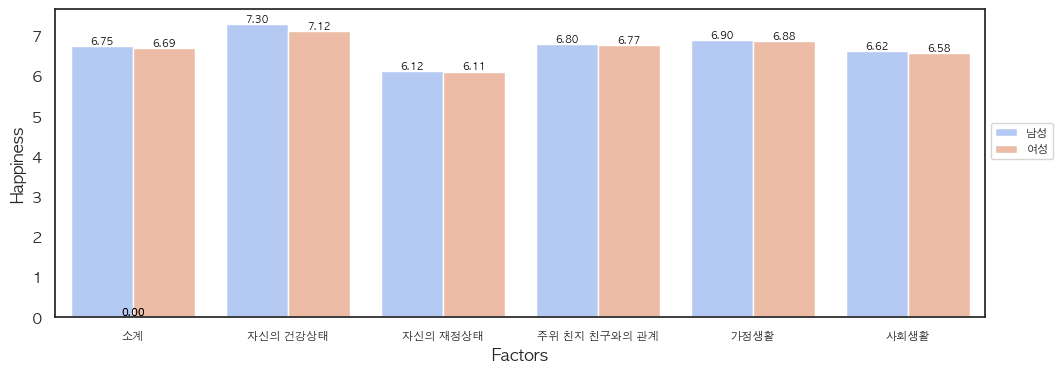

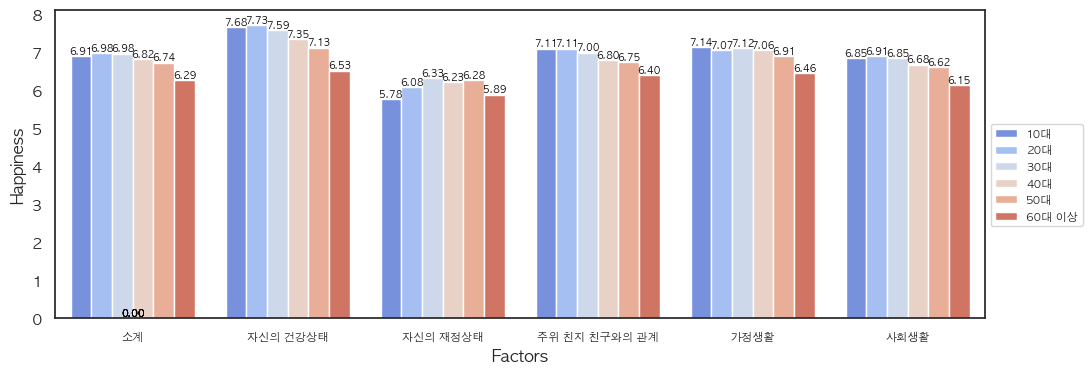

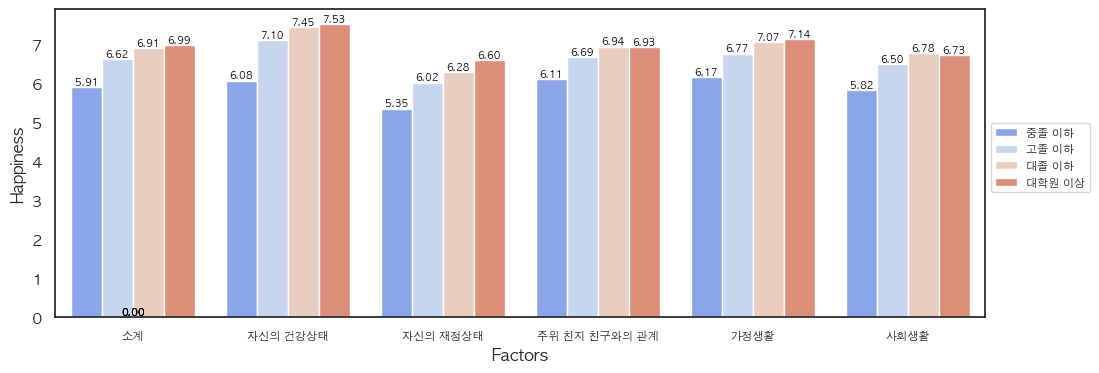

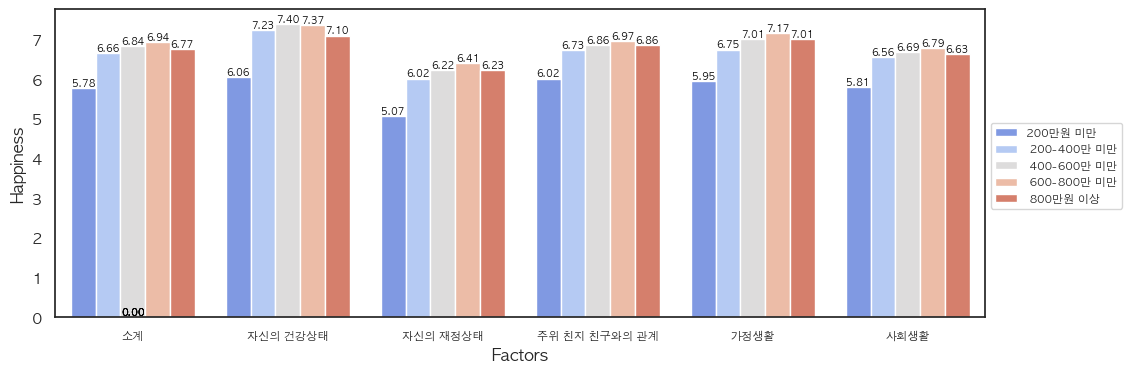

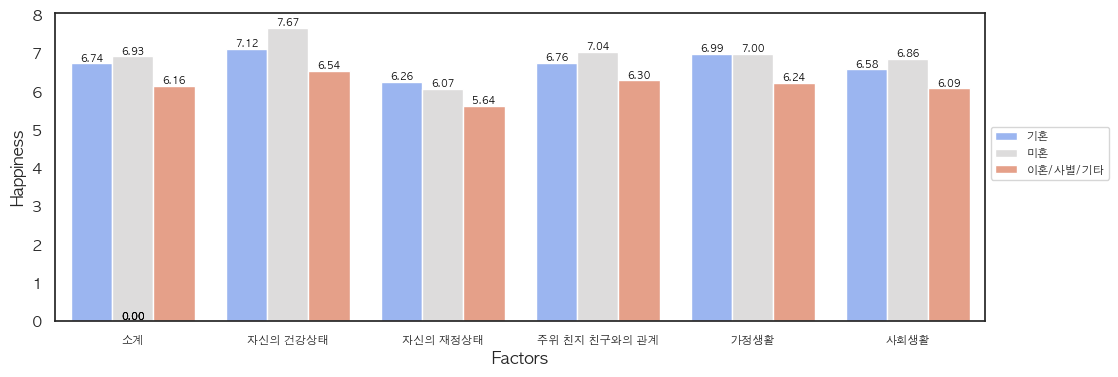

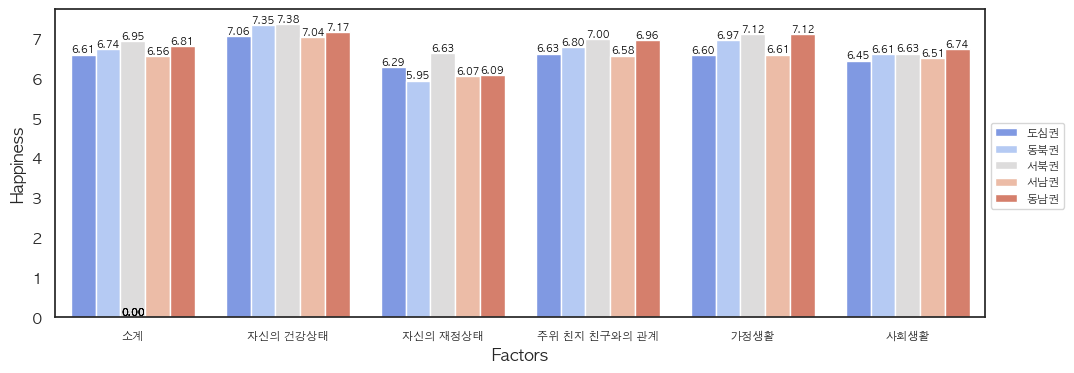

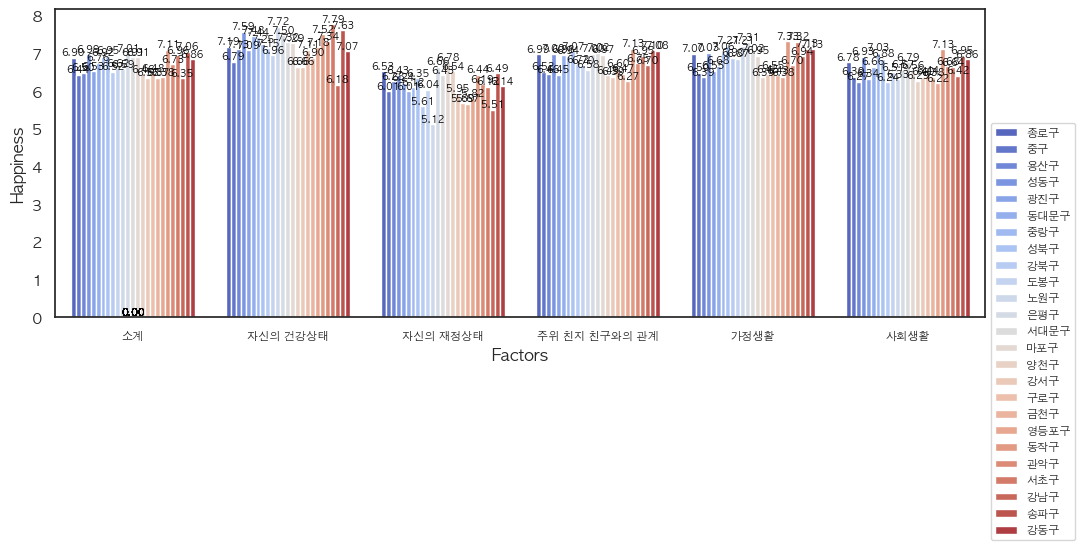

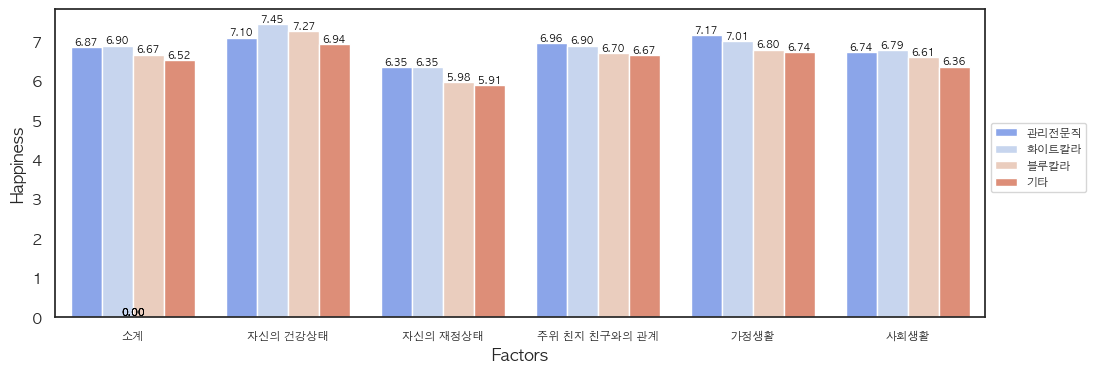

In [402]:
for df in df_list:
    barplot_visualization(df)

In [406]:
import folium
from folium.plugins import MarkerCluster

In [407]:
data = {
    '지역': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
            '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
            '관악구', '서초구', '강남구', '송파구', '강동구'],
    '위도': [37.5730, 37.5647, 37.5314, 37.5635, 37.5420, 37.5744, 37.5975, 37.5891, 
            37.6418, 37.6688, 37.6552, 37.6026, 37.5651, 37.5549, 37.5171, 37.5510,
            37.4945, 37.4594, 37.5192, 37.5121, 37.4784, 37.4837, 37.4834, 37.4954, 37.5045],
    '경도': [126.9794, 126.9895, 126.9646, 127.0365, 127.0838, 127.0400, 127.0928, 127.0182,
            127.0146, 127.0458, 127.0778, 126.9294, 126.9385, 126.9058, 126.8663, 126.8495,
            126.8860, 126.8970, 126.8979, 126.9165, 126.9828, 126.9528, 127.0324, 127.1098, 127.0982],
    '평균점수': [6.898380, 6.443657, 6.502867, 6.993792, 6.534389, 6.760120, 6.917258, 6.950839, 
            6.524210, 6.616179, 6.592073, 7.010155, 6.911447, 6.910673, 6.461574, 6.368454,
            6.478336, 6.370487, 6.376005, 7.111576, 6.731845, 6.963495, 6.351689, 7.058413, 6.857328]
}

resub_df = pd.DataFrame(data)

seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 지역별 평균점수에 따라 마커 추가
marker_cluster = MarkerCluster().add_to(seoul_map)
for i in range(len(resub_df)):
    folium.Marker([resub_df.loc[i, '위도'], resub_df.loc[i, '경도']],
                popup=f"{resub_df.loc[i, '지역']} : {resub_df.loc[i, '평균점수']}",
                icon=None).add_to(marker_cluster)

# 지도 출력
seoul_map